In [35]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import re

In [36]:
driver = webdriver.Chrome(executable_path = r'C:\Users\Hp\OneDrive\Desktop\Data_Science\chromedriver')
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="25da3081f7ebaab5a6247a861461052a")>

# Logging in

In [37]:
stri = 'https://www.instagram.com'
driver.get(stri)
wait = WebDriverWait(driver,10)
wait.until(EC.presence_of_element_located((By.NAME, "username")))
Sample_User = 'sample'
Sample_Pass = 'sample'
user_login=driver.find_element_by_name('username')
user_login.send_keys(Sample_User)
pass_login=driver.find_element_by_name('password')
pass_login.send_keys(Sample_Pass)
form = driver.find_element_by_id('loginForm')
form.submit()

# A Screen Appearing for Saving Login Indo

In [38]:
not1 = driver.find_element_by_class_name('yWX7d')
not1.click()

# A screen Appearing for Turning on Notification

In [39]:
not1 = driver.find_element_by_class_name('HoLwm')
not1.click()

## 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [43]:
# First Finding All those which are apperaing on sending Food and Opening Top 10
# handles and counting their Followers

search = driver.find_element_by_class_name('XTCLo')
search.send_keys('food')
user_ids = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//div[@class='fuqBx']//a")))
store_user_ids = []
for user_id in user_ids:
    html_content = user_id.get_attribute('outerHTML')
    data = BeautifulSoup(html_content,'html.parser').a['href'].split('/')[1]
    if data!='explore':
        store_user_ids.append(data)

store_user_ids = store_user_ids[:10]
print('User Name')
for handle in store_user_ids:
    print(handle)
print('x--------------------------x')
print('Link Of These Accounts')
def total_follower(user_id):
    driver.get(user_id)
    time.sleep(2)
    tag = driver.find_element_by_partial_link_text("followers")
    data = BeautifulSoup(tag.get_attribute('outerHTML'),'html.parser').find('span').get('title')
    follower_count = int(data.replace(',',''))
    driver.back()
    return follower_count

most_followers = {}
for i in store_user_ids:
    print('https://www.instagram.com/' + i)
    most_followers[i] = total_follower('https://www.instagram.com/' + i)
    
print('x--------------------------x')
print('Accounts with their Followers')
for i in most_followers:
    print(i,' ',most_followers[i])
print('x--------------------------x')

User Name
yourfoodlab
thaparfoodfestival
amritsarfood
syeda_nurain
street_food_chandigarh
delhifoodwalks
food
food_era_
just.went.for.food
food.holicc
x--------------------------x
Link Of These Accounts
https://www.instagram.com/yourfoodlab
https://www.instagram.com/thaparfoodfestival
https://www.instagram.com/amritsarfood
https://www.instagram.com/syeda_nurain
https://www.instagram.com/street_food_chandigarh
https://www.instagram.com/delhifoodwalks
https://www.instagram.com/food
https://www.instagram.com/food_era_
https://www.instagram.com/just.went.for.food
https://www.instagram.com/food.holicc
x--------------------------x
Accounts with their Followers
yourfoodlab   1579113
thaparfoodfestival   2493
amritsarfood   2358
syeda_nurain   32779
street_food_chandigarh   86141
delhifoodwalks   137157
food   110422
food_era_   16280
just.went.for.food   4478
food.holicc   9481
x--------------------------x


In [44]:
print('x--------------------------x')
print('Top 5 with their Username and their Followers')
top_5 = []
ans = sorted(most_followers,key = most_followers.get,reverse =True)
j = 0
for i in ans:
    top_5.append(i)
    print(i,' ',most_followers[i])
    j+=1
    if j==5:
        break

x--------------------------x
Top 5 with their Username and their Followers
yourfoodlab   1579113
delhifoodwalks   137157
food   110422
street_food_chandigarh   86141
syeda_nurain   32779


## 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [45]:
user_name = []
posts = []
for user in top_5:
    driver.get('https://www.instagram.com/' + user)
    time.sleep(3)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    driver.find_element_by_xpath('//div[@class="_9AhH0"]').click()
    while True:
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        time_string=driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')
        if time_string[-1] in ['h', 's']:
            count+=1
        elif time_string[-1]=='d' and int(time_string[:-1])<=3:
            count+=1
        else:
            break
        time.sleep(1)
        try:
            next1 = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next1.click()
        except:
            break
    print(user," has ", count, " posts in past 3 days ")  
    user_name.append(user)
    posts.append(count)

yourfoodlab  has  2  posts in past 3 days 
delhifoodwalks  has  3  posts in past 3 days 
food  has  6  posts in past 3 days 
street_food_chandigarh  has  5  posts in past 3 days 
syeda_nurain  has  6  posts in past 3 days 


## 1.3 Depict this information using a suitable graph.

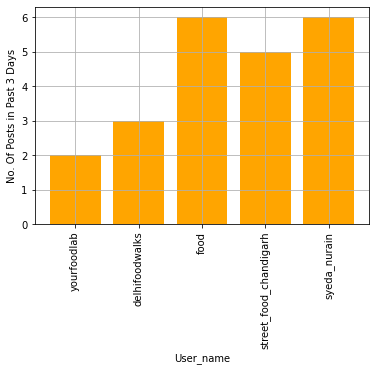

In [46]:
plt.bar(user_name,posts,color = 'orange')
plt.xlabel('User_name')
plt.ylabel('No. Of Posts in Past 3 Days')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

## 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [48]:
content = []
for user in user_name:
    driver.get('https://www.instagram.com/' + user)
    driver.implicitly_wait(10)
    driver.find_element_by_xpath('//div[@class="_9AhH0"]').click()
    j=0
    while True:
        driver.implicitly_wait(10)
        data=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')
        content.append(data.text)
        time.sleep(1)
        j+=1
        if j==10:
            break
        try:
            next1 = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next1.click()
        except:
            break
            
l = 0
for i in range(50):
    if i%10 == 0:
        print('x---------------------------------------------------------x')        
        print('x---------------------------------------------------------x')    
        print(user_name[l])
        l+=1
    print(content[i])
    print('x---------------------------------------------------------x')    
    

x---------------------------------------------------------x
x---------------------------------------------------------x
yourfoodlab
Chole Pattice Recipe is out now on YouTube and Facebook ! Check it out now!

You must have tried several variety of chole pattice but, this sindhi chole pattice is little different.
Having those crispy potato pattice with a falvoured chana dal filling topped with a different flavour of chole and the chutney just makes this dish tast super tasty.
Do try them at your home and let me know you're experience in the comment section below. Cheers!
.
.
.
#pattice #food #chole #chutney #foodporn #streetfood #indiancuisine #foodie #mumbai #mumbaifood #mumbaistreetfood #mumbaifood #sanjyotkeer
x---------------------------------------------------------x
Soya Chaap Tikka Dum Biryani Recipe | Chef @sanjyotkeer

Here’s one of the most awaited and most requested recipes, this biryani variation is a bliss for vegetarians. I used the Daawat Biryani Basmati rice to prep my b

## 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [49]:
freq_word = {}
def is_allowed_specific_char(string):
    charRe = re.compile(r'[^a-zA-Z0-9.]')
    string = charRe.search(string)
    return not bool(string)


for post in content:
    for word in post.split():
        if is_allowed_specific_char(word):
            if word in freq_word:
                freq_word[word] = freq_word[word] + 1
            else:
                freq_word[word]=1
for i in freq_word:
    print(i,' ',freq_word[i])

Chole   1
Pattice   1
Recipe   7
is   43
out   14
now   6
on   14
YouTube   7
and   90
Facebook   4
Check   5
it   22
You   9
must   1
have   8
tried   6
several   1
variety   1
of   32
chole   3
pattice   3
this   22
sindhi   1
little   1
different.   1
Having   1
those   3
crispy   1
potato   1
with   16
a   56
falvoured   1
chana   1
dal   1
filling   1
topped   1
different   3
flavour   2
the   75
chutney   1
just   3
makes   1
dish   1
tast   1
super   2
tasty.   1
Do   5
try   7
them   6
at   12
your   7
home   4
let   5
me   7
know   12
experience   3
in   32
comment   3
section   1
below.   1
.   59
Soya   1
Chaap   1
Tikka   1
Dum   1
Biryani   2
Chef   6
one   16
most   6
awaited   3
requested   1
biryani   2
variation   3
bliss   1
for   25
vegetarians.   1
I   22
used   3
Daawat   1
Basmati   1
rice   2
to   37
prep   5
my   7
results   1
were   2
amazing.   1
recipe   9
how   4
did   5
turn   1
Burnt   2
Chilli   2
Garlic   2
Noodles   2
by   11
up   9
favorite   3
noodles

## 2.3 Create a csv file with two columns : the word and its frequency

In [50]:
words = []
frequency = []
for i in freq_word:
    words.append(i)
    frequency.append(freq_word[i])
df = pd.DataFrame()
df['Word'] = words
df['Frequency'] = frequency
df.to_csv('Words_and_Frequency.csv')
df.head

<bound method NDFrame.head of         Word  Frequency
0      Chole          1
1    Pattice          1
2     Recipe          7
3         is         43
4        out         14
..       ...        ...
802     they          1
803     call          1
804      cuz          1
805  removes          1
806  biggest          1

[807 rows x 2 columns]>

## 2.4 Now, find the hashtags that were most popular among these bloggers

In [51]:
hashtag_and_freq = {}
for post in content:
#     print(post.strip())
    for word in post.split():
        if word[0]=='#':
            if word in hashtag_and_freq:
                hashtag_and_freq[word] = hashtag_and_freq[word] + 1
            else:
                hashtag_and_freq[word] = 1
                
hash = []
ferq = []
ans = sorted(hashtag_and_freq,key = hashtag_and_freq.get,reverse =True)
j = 0
for i in ans:
    print(i,' ',hashtag_and_freq[i])
    hash.append(i)
    ferq.append(hashtag_and_freq[i])
    j+=1
    if j==5:
        break

#food   15
#streetfood   10
#foodporn   9
#walkwithanubhav   9
#nycfood   9


## 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

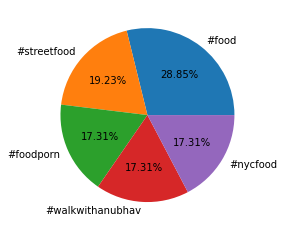

In [52]:
plt.pie(ferq,labels=hash,autopct="%.2f%%")
plt.show()

# 3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [56]:
# Here in posts which are IGTV their likes are not shown instead their views are shown 
# So I am ignoring these posts
# Prinitng Username and their likes
likes_and_user = {}
for user in user_name:
    print('x-----------------------------x')
    print(user)
    print()
    driver.get('https://www.instagram.com/' + user)
    driver.implicitly_wait(10)
    driver.find_element_by_xpath('//div[@class="_9AhH0"]').click()
    j=0
    while True:
        driver.implicitly_wait(5)
        try:
            data=driver.find_element_by_xpath('//a[contains(@class,"zV_Nj")]/span')
            if(len(data.text)>=1):
                j+=1
                value = data.text
                value = value.replace(',','')
                print(value)
                value = int(value)
                if user in  likes_and_user:
                    likes_and_user[user] = likes_and_user[user] + value
                else:
                    likes_and_user[user] = value
            if j==10:
                break
        except:
            if j==10:
                break
            else:
                try:
                    next1 = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
                    next1.click()
                except:
                    break
#         j+=1
        if j==10:
            break
        try:
            next1 = driver.find_element_by_class_name('coreSpriteRightPaginationArrow')
            next1.click()
        except:
            break

x-----------------------------x
yourfoodlab

24750
34107
29788
43885
22791
29392
25038
60715
74657
24666
x-----------------------------x
delhifoodwalks

920
963
506
246
590
1098
271
1379
598
913
x-----------------------------x
food

719
654
708
935
1166
746
681
1510
1037
1090
x-----------------------------x
street_food_chandigarh

1097
1865
1743
1947
1313
2461
1739
1872
1399
1902
x-----------------------------x
syeda_nurain

4054
6634
8122
8442
9023
8102
9120
10734
14374
11611


## 3.2 Calculating Average Likes

In [57]:
for i in likes_and_user:
    likes_and_user[i] = likes_and_user[i]/10
    print(i,' ',likes_and_user[i])

yourfoodlab   36978.9
delhifoodwalks   748.4
food   924.6
street_food_chandigarh   1733.8
syeda_nurain   9021.6


## 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [59]:
user29 = []
avg = []
for i in likes_and_user:
    user29.append(i)
    avg.append(likes_and_user[i]/most_followers[i])
    print(i,' ',likes_and_user[i]/most_followers[i])

yourfoodlab   0.023417513502833553
delhifoodwalks   0.005456520629643401
food   0.008373331401351181
street_food_chandigarh   0.02012746543457819
syeda_nurain   0.2752249916104823


## 3.4 Create a bar graph to depict the above obtained information.

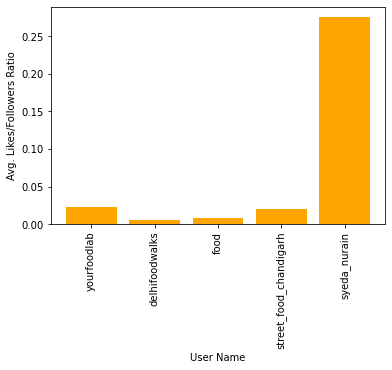

In [60]:
plt.bar(user29,avg,color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel('User Name')
plt.ylabel('Avg. Likes/Followers Ratio')
plt.show()


<class 'list'>
